# Exercise Week 7:Clustering
-------------------------------------------

dataset:

a. https://raw.githubusercontent.com/GTerrence/dataset/main/COVID-19%20Coronavirus.csv


Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer

Load dataset

In [2]:
url = "https://raw.githubusercontent.com/GTerrence/dataset/main/COVID-19%20Coronavirus.csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


Data Preparation

1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [5]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

<AxesSubplot:>

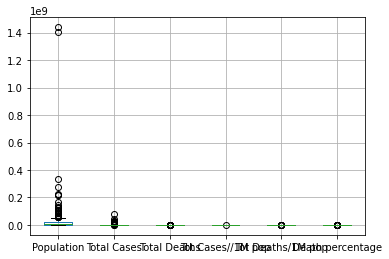

In [6]:
#check outliers
df.boxplot()

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Total Cases'}>],
       [<AxesSubplot:title={'center':'Total Deaths'}>,
        <AxesSubplot:title={'center':'Tot\xa0Cases//1M pop'}>],
       [<AxesSubplot:title={'center':'Tot\xa0Deaths/1M pop'}>,
        <AxesSubplot:title={'center':'Death percentage'}>]], dtype=object)

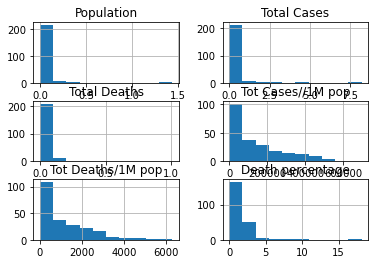

In [7]:
#check skew
df.hist()

In [8]:
#check unique values to mapping
#unique_continents = df["Continent"].unique()
#print(unique_continents)

In [9]:
df = df.rename(columns={df.columns[7]: "Total Cases per one mill", df.columns[8]: "Total Deaths per one mill"})

In [10]:
le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df['Continent'] = le.fit_transform(df['Continent'])
df['Other names'] = le.fit_transform(df['Other names'])
df['ISO 3166-1 alpha-3 CODE'] = le.fit_transform(df['ISO 3166-1 alpha-3 CODE'])
df["Population"] = le.fit_transform(df["Population"])
df['Total Cases'] = le.fit_transform(df['Total Cases'])
df['Total Cases per one mills'] = le.fit_transform(df['Total Cases per one mill'])
df['Total Deaths per one mill'] = le.fit_transform(df['Total Deaths per one mill'])
df['Total Deaths'] = le.fit_transform(df['Total Deaths'])
df["Death percentage"] = le.fit_transform(df["Death percentage"])
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases per one mill,Total Deaths per one mill,Death percentage,Total Cases per one mills
0,0,0,1,188,1,113,136,4395,47,209,40
1,1,1,4,88,2,124,112,95349,122,132,114
2,2,2,57,191,0,123,133,5873,40,190,47
3,3,3,5,27,2,73,32,516565,155,33,222
4,4,4,2,183,0,98,93,2862,20,157,27


In [11]:
#Mapping categorical value
#continent_map = {'Northern America': 6, 'Oceania': 5, 'Latin America and the Caribbean': 4, 'Africa': 3, 'Europe': 2, 'Asia': 1}
#df['Continent'] = df['Continent'].map(continent_map)
#df.head()

In [12]:
scaler = StandardScaler()

# Melakukan scaling pada dataframe
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.72436983, -1.72436983, -1.70897368, ..., -0.73630958,
         1.60438329, -1.10852347],
       [-1.70897368, -1.70897368, -1.6627852 , ...,  0.49929346,
         0.41509951,  0.03079232],
       [-1.69357752, -1.69357752, -0.84678876, ..., -0.85163253,
         1.31092365, -1.00075035],
       ...,
       [ 1.69357752,  1.6627852 ,  1.67818136, ..., -1.11522784,
         1.72794524, -1.61659672],
       [ 1.70897368,  1.67818136,  1.70897368, ..., -0.68688546,
         0.39965427, -0.73901564],
       [ 1.72436983,  1.69357752,  1.72436983, ..., -0.45623956,
         1.04835451, -0.7544118 ]])

In [13]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases per one mill,Total Deaths per one mill,Death percentage,Total Cases per one mills
0,0,0,1,188,1,113,136,4395,47,209,40
1,1,1,4,88,2,124,112,95349,122,132,114
2,2,2,57,191,0,123,133,5873,40,190,47
3,3,3,5,27,2,73,32,516565,155,33,222
4,4,4,2,183,0,98,93,2862,20,157,27


## K-Means Clustering

Dengan elbow method, tentukan jumlah cluster yang ingin dibentuk

Gunakan range elbow range(1, 11)

C:\Users\KENT LEE\Downloads\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


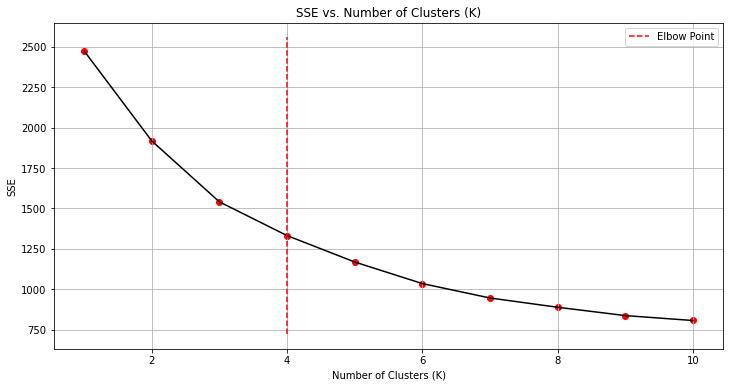

In [14]:
from sklearn.cluster import KMeans
kmeans_kwargs = {"init" : "k-means++","n_init" :10,"max_iter":300, "random_state":42}
sse=[]
# check the inertia for each K
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(scaled_data) 
    sse.append(kmeans.inertia_)
    
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='red')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()

In [15]:
#using kneelocator to find the elbow/knee
kneed = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneed.elbow)

The best k for you model is 4


Training model K-Means pada dataset dengan jumlah cluster yang Anda tentukan

In [16]:
#Group into 4 cluster
kmeans1 = KMeans(n_clusters=4,init="random").fit(scaled_data)
sse.append(kmeans.inertia_)
df_kmeans = kmeans1.predict(scaled_data)
df["Cluster"]= df_kmeans
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases per one mill,Total Deaths per one mill,Death percentage,Total Cases per one mills,Cluster
0,0,0,1,188,1,113,136,4395,47,209,40,0
1,1,1,4,88,2,124,112,95349,122,132,114,2
2,2,2,57,191,0,123,133,5873,40,190,47,0
3,3,3,5,27,2,73,32,516565,155,33,222,2
4,4,4,2,183,0,98,93,2862,20,157,27,0


# Tampilkan dalam bentuk dataframe kesimpulan dari cluster:

1. kolom bertipe categorical: modus (gunakan pd.Series.mode untuk mencari modus, untuk menggunakan attribute ini tidak perlu pakai " ")
2. kolom bertipe continous : mean
3. Hasil cluster: count

karena datanya yang categorical dan ada redundant hanya ada pada feature continent, maka dari itu hanya muncul column continent saja dalam penggunaan pd.Series.mode, sedangkan Country dan Other names value-nya unique semua alias berbeda semua valuenya dan tidak redundant, maka dari itu tidak muncul pada saat menggunakan pd.Series.mode ini

In [39]:
df.groupby("Cluster")["Country","Other names","Continent"].agg(pd.Series.mode)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\3026186976.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Cluster")["Country","Other names", "Continent"].agg(pd.Series.mode)
C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\3026186976.py:1: FutureWarning: ['Country', 'Other names'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("Cluster")["Country","Other names", "Continent"].agg(pd.Series.mode)


,Continent
Cluster,
0,0
1,1
2,"[2, 3]"
3,3


In [27]:
df.groupby("Cluster")["Total Cases", "Total Deaths", "Total Cases per one mill", "Total Deaths per one mill", "Death percentage"].agg(pd.Series.mean)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\3567072672.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Cluster")["Total Cases", "Total Deaths", "Total Cases per one mill", "Total Deaths per one mill", "Death percentage"].agg(pd.Series.mean)


,Total Cases,Total Deaths,Total Cases per one mill,Total Deaths per one mill,Death percentage
Cluster,,,,,
0,71.333333,70.079365,8176.523810,29.222222,142.301587
1,172.383333,155.383333,141082.333333,119.916667,116.783333
2,147.566038,127.641509,213520.943396,137.792453,102.339623
3,47.346939,23.918367,214406.387755,87.591837,46.061224


In [28]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0    63
1    60
2    53
3    49
Name: Cluster, dtype: int64

## Hierarchical Clustering
Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan max method.

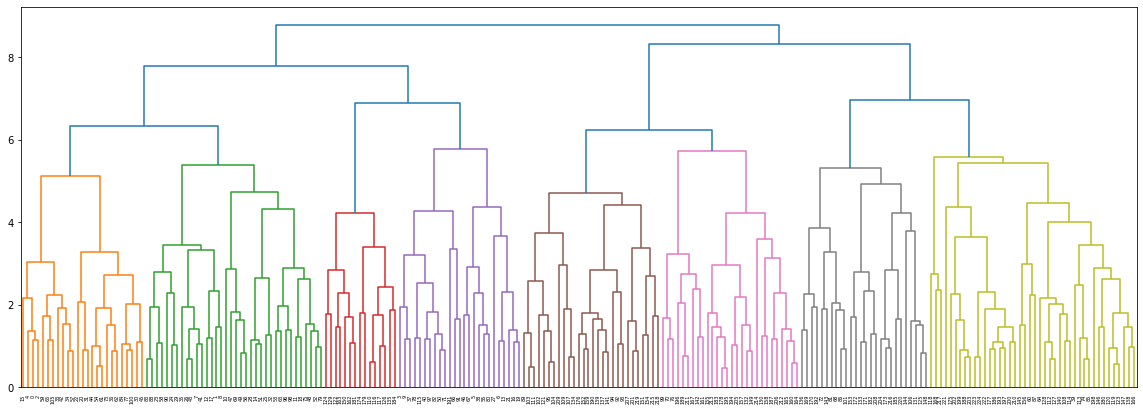

In [33]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='complete')
dendrogram(linkage_data)
plt.show()

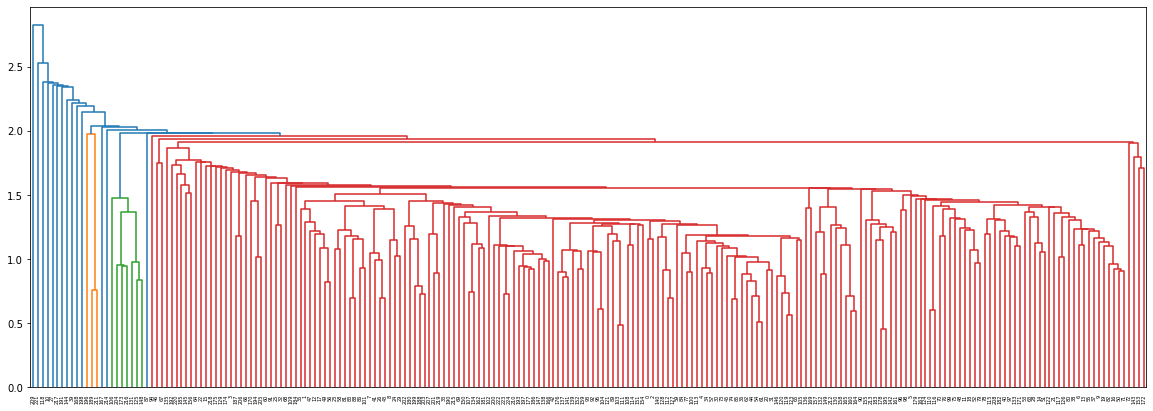

In [45]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='single')
dendrogram(linkage_data)
plt.show()

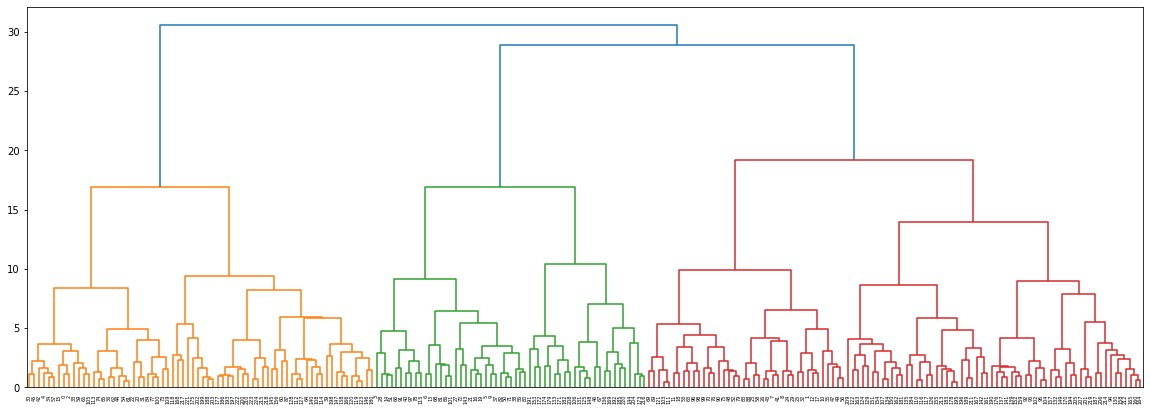

In [46]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='ward')
dendrogram(linkage_data)
plt.show()

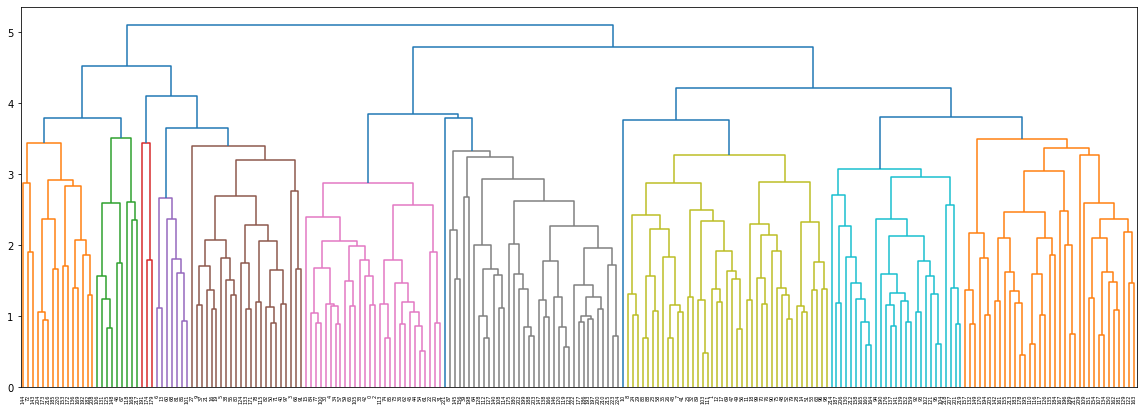

In [47]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='average')
dendrogram(linkage_data)
plt.show()

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [35]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
label = model.fit_predict(scaled_data)
print(label)

[1 3 1 0 1 0 0 3 3 0 3 3 3 0 0 1 0 3 3 0 1 0 1 3 3 3 3 0 0 3 1 1 3 1 1 3 1
 0 0 1 0 3 1 3 1 1 0 3 3 3 0 0 3 3 1 0 3 1 3 1 1 1 1 3 1 1 0 0 0 3 3 0 0 1
 1 3 3 1 0 3 0 0 0 3 1 1 0 1 3 3 3 0 2 2 2 2 3 0 3 3 1 0 2 3 2 1 0 2 1 1 2
 3 1 1 1 0 2 2 1 1 1 3 2 1 2 0 2 1 1 2 2 0 2 0 2 2 0 2 1 2 1 2 2 0 0 1 1 1
 0 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 0 2 0 0 0 0 1 2 1 2 0 1 2 0 2 2
 0 1 2 1 2 2 0 0 1 2 2 2 1 1 1 1 2 1 1 0 2 2 2 0 2 1 2 2 2 2 1 0 1 1 2 0 1
 1 1 1]


Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [41]:
df["Agglo"] = label
df.groupby("Agglo")["Country","Other names","Continent"].agg(pd.Series.mode)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\783924923.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Agglo")["Country","Other names","Continent"].agg(pd.Series.mode)
C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\783924923.py:2: FutureWarning: ['Country', 'Other names'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("Agglo")["Country","Other names","Continent"].agg(pd.Series.mode)


,Continent
Agglo,
0,3
1,0
2,1
3,2


In [42]:
df.groupby("Agglo")["Total Cases", "Total Deaths", "Total Cases per one mill", "Total Deaths per one mill", "Death percentage"].agg(pd.Series.mean)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_35084\2968897543.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Agglo")["Total Cases", "Total Deaths", "Total Cases per one mill", "Total Deaths per one mill", "Death percentage"].agg(pd.Series.mean)


,Total Cases,Total Deaths,Total Cases per one mill,Total Deaths per one mill,Death percentage
Agglo,,,,,
0,50.272727,28.945455,214226.163636,96.581818,57.927273
1,76.214286,74.085714,10129.114286,31.300000,139.042857
2,165.916667,145.083333,172821.333333,125.200000,107.050000
3,173.075000,154.800000,198545.675000,140.400000,107.775000


In [43]:
df.groupby("Agglo")["Agglo"].agg(pd.Series.count)

Agglo
0    55
1    70
2    60
3    40
Name: Agglo, dtype: int64